### ASTR-598C, Autumn 2019, University of Washington

# Week 10: Machine Learning Practice - Part 1

Notebooks by Joachim Moeyens, based in part on Adam Miller's Introduction to the Machine Learning for the DSFP.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8, 
        context="paper", 
        style="ticks", 
        rc={"axes.linewidth": 0.8})
sns.set_palette("Set2", 3)

%matplotlib inline

### Goals
- Introduction to tools: `pandas`, `seaborn` and `scikit-learn`
- Understanding a sample `scikit-learn` workflow
    - Setting up a model
    - Fitting a training set of data with the model
    - Using the model to make predictions on a test dataset
    - Evaluating model performance

### Data

We will be attempting to model Fisher's iris data set. In the 1930s, [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson) collected measurements of sepal width and length in addition to petal width and length for three different species of iris flower. [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) used these data to build a mathematical model to delineate the three species known as linear discriminant analysis (LDA). 

![iris](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

We will model the same dataset using several (simple) machine learning algorithms all using the same Python framework.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Let us convert the data dictionary into a pandas DataFrame
# Don't worry too much about the details of what is happening in this cell 
# It is just data wrangling -- trial and error with a fancy name. 
data = pd.DataFrame(iris["data"], 
                    columns=iris["feature_names"])
data["species"] = iris["target"]
data["species"] = data["species"].replace({i : n for i, n in enumerate(iris.target_names)})

In [6]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We have now loaded the iris dataset into a `pandas.DataFrame`. `pandas` is a powerful python package that stores data in a tabular format. You can filter subsets of the data, in the next cell we select all data for the viriginica species of Iris flower. 

In [7]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

In [8]:
for f in features:
    print("{} median {}".format(f, data[data["species"] == "virginica"][f].median()))

sepal length (cm) median 6.5
sepal width (cm) median 3.0
petal length (cm) median 5.55
petal width (cm) median 2.0


Another powerful selection function is `.isin()`

In [9]:
data[data["species"].isin(["setosa", "virginica"])]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Problem 0:** For each species, calculate the median and standard deviation for each feature. 

In [13]:
for species in data["species"].unique():
    print("Species : {}".format(species))
    for f in features:
        print("{} median={}, standard deviation={}".format(f, data[data["species"] == species][f].median(),data[data["species"] == species][f].std()))

Species : setosa
sepal length (cm) median=5.0, standard deviation=0.35248968721345136
sepal width (cm) median=3.4, standard deviation=0.3790643690962887
petal length (cm) median=1.5, standard deviation=0.17366399648018407
petal width (cm) median=0.2, standard deviation=0.10538558938004565
Species : versicolor
sepal length (cm) median=5.9, standard deviation=0.5161711470638634
sepal width (cm) median=2.8, standard deviation=0.3137983233784114
petal length (cm) median=4.35, standard deviation=0.46991097723995795
petal width (cm) median=1.3, standard deviation=0.19775268000454405
Species : virginica
sepal length (cm) median=6.5, standard deviation=0.6358795932744322
sepal width (cm) median=3.0, standard deviation=0.32249663817263746
petal length (cm) median=5.55, standard deviation=0.5518946956639834
petal width (cm) median=2.0, standard deviation=0.2746500556366674


This is obviously a little cumbersome... so let's use built-in `pandas` functionality. We can group the DataFrame by species and then for each species calculate the median and standard deviation. 

In `pandas` this is done as follows:

In [14]:
data.groupby(by=["species"]).agg(["median", "std"])

sepal length (cm)           sepal width (cm)            \
                      median       std           median       std   
species                                                             
setosa                   5.0  0.352490              3.4  0.379064   
versicolor               5.9  0.516171              2.8  0.313798   
virginica                6.5  0.635880              3.0  0.322497   

           petal length (cm)           petal width (cm)            
                      median       std           median       std  
species                                                            
setosa                  1.50  0.173664              0.2  0.105386  
versicolor              4.35  0.469911              1.3  0.197753  
virginica               5.55  0.551895              2.0  0.274650

`pandas` supports user-defined metrics as well. Also, check out `.describe()`: 

In [15]:
data.groupby(by=["species"]).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

As is true almost 100% of the time, we can learn the most about our data if we just plot it! (REMEMBER: Always plot your data!) 

**Problem 1:** Make a scatter plot of two features of your choice for the iris data set. Color the points by their respective iris type (i.e. labels).

In [16]:
data["sepal length (cm)"].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


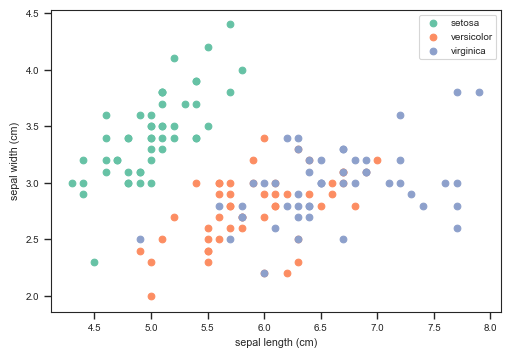

In [20]:
print(features)
fig, ax = plt.subplots(1, 1, dpi=100)
x_feature = features[0]
y_feature = features[1]
for species in data["species"].unique():
    ax.scatter(data[data["species"] == species][x_feature], 
               data[data["species"] == species][y_feature], 
               label=species)
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_aspect("equal")
ax.legend()

Which features did you pick to plot? How do you plot data that is fundamentally more than two dimensional? For the features that you did decide to plot, do you notice any trends?

**Problem 2:** Use `seaborn`'s `pairplot` to plot all four features against each other. 

`seaborn` is a plotting package built on top of `matplotlib` designed to work in tandem with `pandas`.

In [21]:
sns.pairplot?

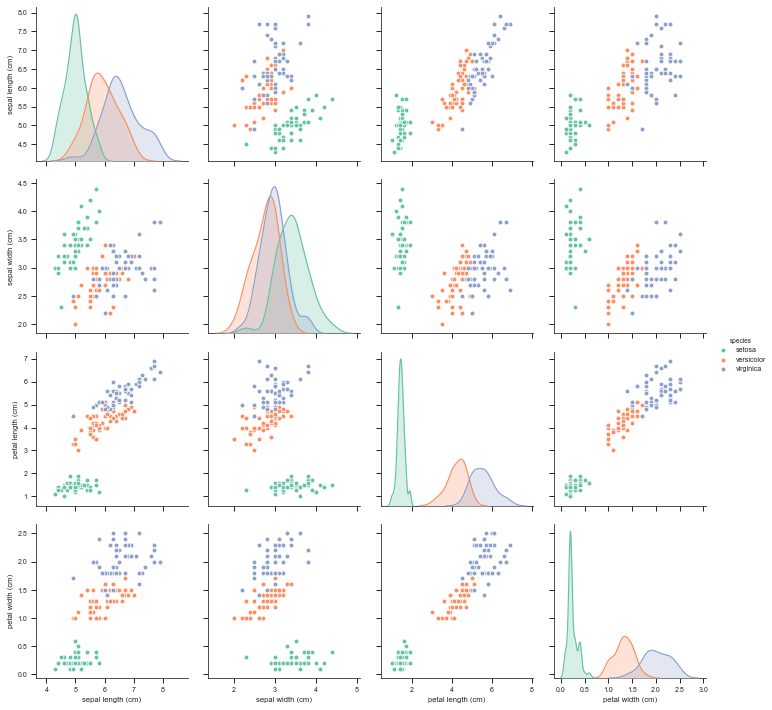

In [22]:
fig = sns.pairplot(
    data=data, hue='species'
)

**Problem 3:** What species seems like it will be easiest to classify? What two features do you think will be easiest to use to separate the species? 

### Model Our Data

`scikit-learn`'s API is built around the use of `numpy` arrays. In general, it is helpful to extract the features of your data into an array of shape [n_samples, n_features]. This data array is often called X. The known labels are stored in a separate array which is often denoted as y. 

In [23]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
Y = data["species"].values

Notice that our array of labels are literally labels, ie, they are strings. It is always useful to convert your labels to unique integer values. `scikit-learn` will do this internally when you fit your data, however, for the sake of consistency and also for plotting purposes we will do this here. 

**Problem 4:** Using `LabelEncoder`, convert the array of labels ('setosa', 'virginica', 'versicolor') to an array of integers (0, 1, 2). 

In [ ]:
Y

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
### Add more code here! 
y = ...

In [ ]:
LabelEncoder?

In [ ]:
# What does y look like?

There are other ways of doing this as well. With `pandas`, for example, you can use `.replace` on a column: 

In [ ]:
mapping = {n : i for i, n in enumerate(data["species"].unique())}
print(mapping)
y_alt = data["species"].replace(mapping)

In [ ]:
y_alt.values

For today, we will focus on using algorithms to do classification. Our ultimate goal is to be able to predict what species an iris flower belongs to given a set of sepal and petal dimensions. 

To train our algorithms we must first divide our data into a training and testing set. 

** Problem 5:** Split the iris data into a training (25%) and sample set (75%). 

In [ ]:
from sklearn.model_selection import train_test_split

### Try using train_test_split! 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=...., 
                                                    random_state=....)

In [ ]:
# What is the shape of your training dataset?

In [ ]:
# What is the shape of your test dataset?

### Algorithm: Decision Tree

In [ ]:
def plotClassifier(preds, 
                   x_feature="sepal length (cm)", 
                   y_feature="sepal width (cm)"):
    """
    Plots a classifier's predictions and circles the incorrect ones.
    
    
    """
    # Set colormap of length 3, one for each species
    colors = np.array(sns.color_palette("Set2", 3).as_hex())
    
    # Instantiate figure
    fig, ax = plt.subplots(1, 2, dpi=200)
    fig.subplots_adjust(wspace=0.25)

    # Isolate features from DataFrame
    features = data.columns.values
    x_col = np.where(x_feature == features)[0]
    y_col = np.where(y_feature == features)[0]

    # Plot data
    for i, species in enumerate(data["species"].unique()):
        ax[0].scatter(data[data["species"] == species][x_feature], 
                      data[data["species"] == species][y_feature], 
                      label=species,
                      c=colors[i],
                      s=2)
    ax[0].set_xlabel(x_feature)
    ax[0].set_ylabel(y_feature)
    ax[0].set_title("Truth")
    ax[0].set_aspect("equal")
    ax[0].legend(bbox_to_anchor=(2.7, 0.7), frameon=False)

    # Plot training data 
    ax[1].scatter(X_train[:, x_col], 
                  X_train[:, y_col], 
                  c=colors[y_train],
                  s=2,
                  marker="s")

    # Plot test data (circle incorrect ones)
    ax[1].scatter(X_test[:, x_col], 
                  X_test[:, y_col], 
                  c=colors[preds],
                  s=2)
    for incorrect in X_test[y_test != preds]:
        circle = plt.Circle((incorrect[x_col], incorrect[y_col]), 0.07, color="r", fill=None)
        ax[1].add_artist(circle)

    ax[1].set_xlabel(x_feature)
    ax[1].set_ylabel(y_feature)
    ax[1].set_title("Predictions")
    ax[1].set_aspect("equal")
    return fig, ax 

**Problem 6:** Use a decision tree to classify the iris data set. Using `plotClassifier`, plot the predictions. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(# Fill me in with training set data!)
preds = clf.predict(# Fill me in with test data!)

In [ ]:
fig, ax = plotClassifier(preds)

How do we determine how well our algorithm performed? `scikit-learn` comes with a variety of performance metrics that allows the user to determine how well their model performed for a given task.

One method of determining how well our model performed is generalization: how well does it predict new data? A method for doing this is called cross validation -- the model is trained using a different subset of our data, and then tested on the remainder to see how well it models the data. When performing cross validation it is typical to iterate through your entire dataset in different chunks or folds of training set. 

**Problem 7:** Using `cross_val_predict` and 3 cross validation folds, evaluate how well the decision tree classifier performs as a whole (calculate how many predictions were correct as a percentage). How well does the decision tree classifier classify each class? What is your `cross_val_predict` doing if you change the number of folds to say.. 5 or 8 or 50?

In [ ]:
from sklearn.model_selection import cross_val_predict

cv_preds = cross_val_predict(...)

In [ ]:
print("Overall accuracy: {:.2f} %".format(100 * (1 - np.sum(cv_preds != y) / len(y))))

In [ ]:
for i, species in enumerate(np.unique(Y)):
    species_mask = np.where(y == i)
    print("{}: {:.2f} %".format(species, 
                                100 * ( 1 - np.sum(y[species_mask] != cv_preds[species_mask]) / len(y[species_mask]))))

I've made you go through a little bit of an exercise in `numpy`. You can also use `cross_val_score` to save yourself time and effort. 


In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(clf, X, y, cv=3)

In [ ]:
print(cv_score)

**Problem 8:** Each `scikit-learn` model also comes with a `.score` attribute. How is this different from `cross_val_score`? Start by calculating the score using the model attribute and try using the training and testing subset of data (or the entire dataset).

In [ ]:
# Calculate training set score.. why is it what it is?

In [ ]:
# Calculate test set score

In [ ]:
# Calculate full set score

So what have we just done? We classified the iris data set using an out of the box `scikit-learn` algorithm. We evaluated how well that algorithm performs predictions for each of the species. What now?

Lets try a different algorithm! 

### Algorithm: Random Forest Classifier

**Problem 9:** Repeat what we did for the decision tree classifier but this time instead using a random forest classifier. 

In particular, try setting `n_estimators` to 1, 5, 10, 50 and 100. For each, calculate the accuracy score and plot the classifications. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for n in [1, 5, 10, 50, 100]:
    # Use what you have learned for the scikit-learn syntax! 
    clf = RandomForestClassifier(....)
    clf.fit(....)
    preds = clf.predict(....)

    score = clf.score(....)
    cv_score = cross_val_score(clf, X, y, cv=3)
    print("N_estimators: {}, Score: {:.2f} %".format(n, 100*score))
    
    fig, ax = plotClassifier(preds)
    fig.suptitle("N_estimators: {}".format(n), y=0.8)

### Algorithm: k - Nearest Neighbor

**Problem 10:** Now do the same for a k-NN classifier. What can we tell about how the k-NN classifier works as we change the number of neighbors (try: n = 1, 5, 10, 25)? Why won't n_neighbors above ~40 work?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for n in [1, 5, 10, 25]:
    # Start by copying the RandomForestClassifier example! 

### Final Thoughts:
- What did we notice about the syntax for `scikit-learn` models?
- How do we make this unsupervised learning?
- What happens if we increase or decrease the percentage of our data we choose to train on?

### Resources:
- [Scikit-learn Classifier Comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
- [Scikit-learn Clustering Comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)
- [LSSTC DSFP Tutorials](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/)
